In [ ]:
import warnings
warnings.filterwarnings('once')

#문제상황

신용카드 분실로 인하여 신용카드 오용 및 도용 범죄는 항상 존재 하였다.

이러한 범죄를 막기 위하여 신용카드 데이터를 활용하여 카드의 이상 거래 탐지를 할 수 있는 방법을 찾아보자.

#데이터 살펴보기

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
['{}: {}'.format(i, name) for (i, name) in enumerate(list(df.columns))]

['0: class',
 '1: v1',
 '2: v2',
 '3: v3',
 '4: v4',
 '5: v5',
 '6: v6',
 '7: v7',
 '8: v8',
 '9: v9',
 '10: v10',
 '11: v11',
 '12: v12',
 '13: v13',
 '14: v14',
 '15: v15',
 '16: v16',
 '17: v17',
 '18: v18',
 '19: v19',
 '20: v20',
 '21: v21',
 '22: v22',
 '23: v23',
 '24: v24',
 '25: v25',
 '26: v26',
 '27: v27',
 '28: v28',
 '29: log_amount']

In [ ]:
df.head()

,class,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,log_amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008105
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989913
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936641
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816249
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248367


In [ ]:
df.shape

(284807, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   class       284807 non-null  int64  
 1   v1          284807 non-null  float64
 2   v2          284807 non-null  float64
 3   v3          284807 non-null  float64
 4   v4          284807 non-null  float64
 5   v5          284807 non-null  float64
 6   v6          284807 non-null  float64
 7   v7          284807 non-null  float64
 8   v8          284807 non-null  float64
 9   v9          284807 non-null  float64
 10  v10         284807 non-null  float64
 11  v11         284807 non-null  float64
 12  v12         284807 non-null  float64
 13  v13         284807 non-null  float64
 14  v14         284807 non-null  float64
 15  v15         284807 non-null  float64
 16  v16         284807 non-null  float64
 17  v17         284807 non-null  float64
 18  v18         284807 non-null  float64
 19  v1

In [ ]:
df.describe()

,class,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,log_amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.001727,1.170770e-15,3.384974e-16,-1.373150e-15,2.087268e-15,9.604066e-16,1.496893e-15,-5.572434e-16,1.223461e-16,-2.406530e-15,...,6.449614e-16,1.652570e-16,-3.448842e-16,2.640519e-16,4.472018e-15,5.085445e-16,1.687070e-15,-3.680735e-16,-1.246662e-16,2.942089
std,0.041527,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,2.023685
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-6.907755
25%,0.000000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,1.722945
50%,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,3.091088
75%,0.000000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,4.345959
max,1.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,10.153902


In [ ]:
#feature에 대한 meta data가 없기 때문에 feature selection을 하기 어려움
df.columns.tolist()

['class',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'log_amount']

In [ ]:
df.isnull().sum()

class         0
v1            0
v2            0
v3            0
v4            0
v5            0
v6            0
v7            0
v8            0
v9            0
v10           0
v11           0
v12           0
v13           0
v14           0
v15           0
v16           0
v17           0
v18           0
v19           0
v20           0
v21           0
v22           0
v23           0
v24           0
v25           0
v26           0
v27           0
v28           0
log_amount    0
dtype: int64

In [ ]:
df.groupby('class')['v1'].count()

class
0    284315
1       492
Name: v1, dtype: int64

#문제해결 프로세스 정의

##문제정의

신용카드는 사용에 있어서는 높은 편의성을 제공하지만, 카드의 분실 혹은 도난을로 인한 비정상적인 거래(이상거래)가 발생할 수 있다.

대부분의 금융기관에서는 특정 조건(시간, 장소 등)과 개인의 특성을 매핑하여 트리거를 만들어서 경보시스템을 운영한다

위와 같은 조건으로 알림을 주는것도 좋은 방법이지만, 다양한 feature을 활용하여 복합적인 상황에서도 이상거래를 탐지할 수 있는 모델을 만들어서 운영하려 한다.

##기대효과

이상거래 탐지모델을 통한 이상거래 상시 자동탐지

이상거래로 인하여 발생하는 고객의 피해 금액 감소

##해결방안

Binary classification을 통한 이상거래 여부 분류

Session 1
- Data Visualization

Session 2
- Modeling(Logistic regression, K-Nearest NEighbors, Random Forest)

Session 3
- Oversampling(imbalance-learn)

##성과측정

이상거래 탐지율

#Session 1 - Data 전처리 및 EDA

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from time import time
from pprint import pprint

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV#모델 optimize에 필요하여 패키지 import
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import cohen_kappa_score, precision_recall_fscore_support

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [ ]:
#target data의 불균형이 매우 심함
pd.concat([df['class'].value_counts(), df['class'].value_counts(normalize = True).round(5)], axis = 1)

,count,proportion
class,,
0,284315,0.99827
1,492,0.00173


In [ ]:
y0_under = df.loc[df['class'] == 0, :].sample(frac = 0.05, replace = False, random_state = 1)
y1_under = df.loc[df['class'] == 1, :].sample(frac = 0.05, replace = False, random_state = 1)

In [ ]:
df_under = pd.concat([y0_under, y1_under], axis = 0)

In [ ]:
pd.concat([df_under['class'].value_counts(), df_under['class'].value_counts(normalize = True).round(5)], axis = 1)

,count,proportion
class,,
0,14216,0.99824
1,25,0.00176


In [ ]:
neg, pos = np.bincount(df_under['class'])
print('Total: {}\n  Postive: {} ({:.3f}% of total)\n'.format(neg+pos, pos, 100 * pos / (neg+pos)))

Total: 14241
  Postive: 25 (0.176% of total)



In [ ]:
X = df_under.drop('class', axis = 1).values
y = df_under['class'].values.astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [ ]:
X_train.shape

(9968, 29)

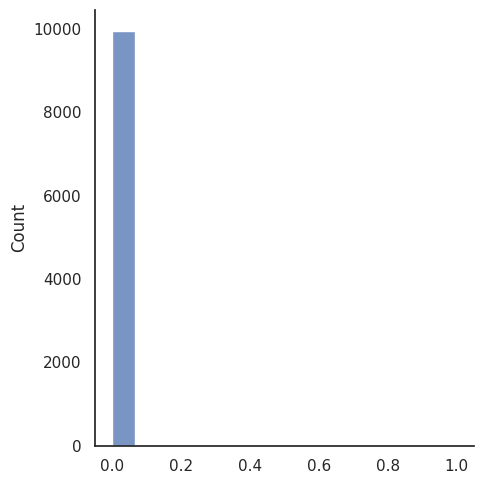

In [ ]:
sns.displot(y_train)

In [ ]:
X_train.T.shape

(29, 9968)

In [ ]:
df_under.head()

,class,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,log_amount
106066,0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,1.031270,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,6.291571
102005,0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,-0.299226,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,1.930216
278450,0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.073391,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,2.995282
120218,0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.106821,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,2.879255
258527,0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.013126,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,3.197897


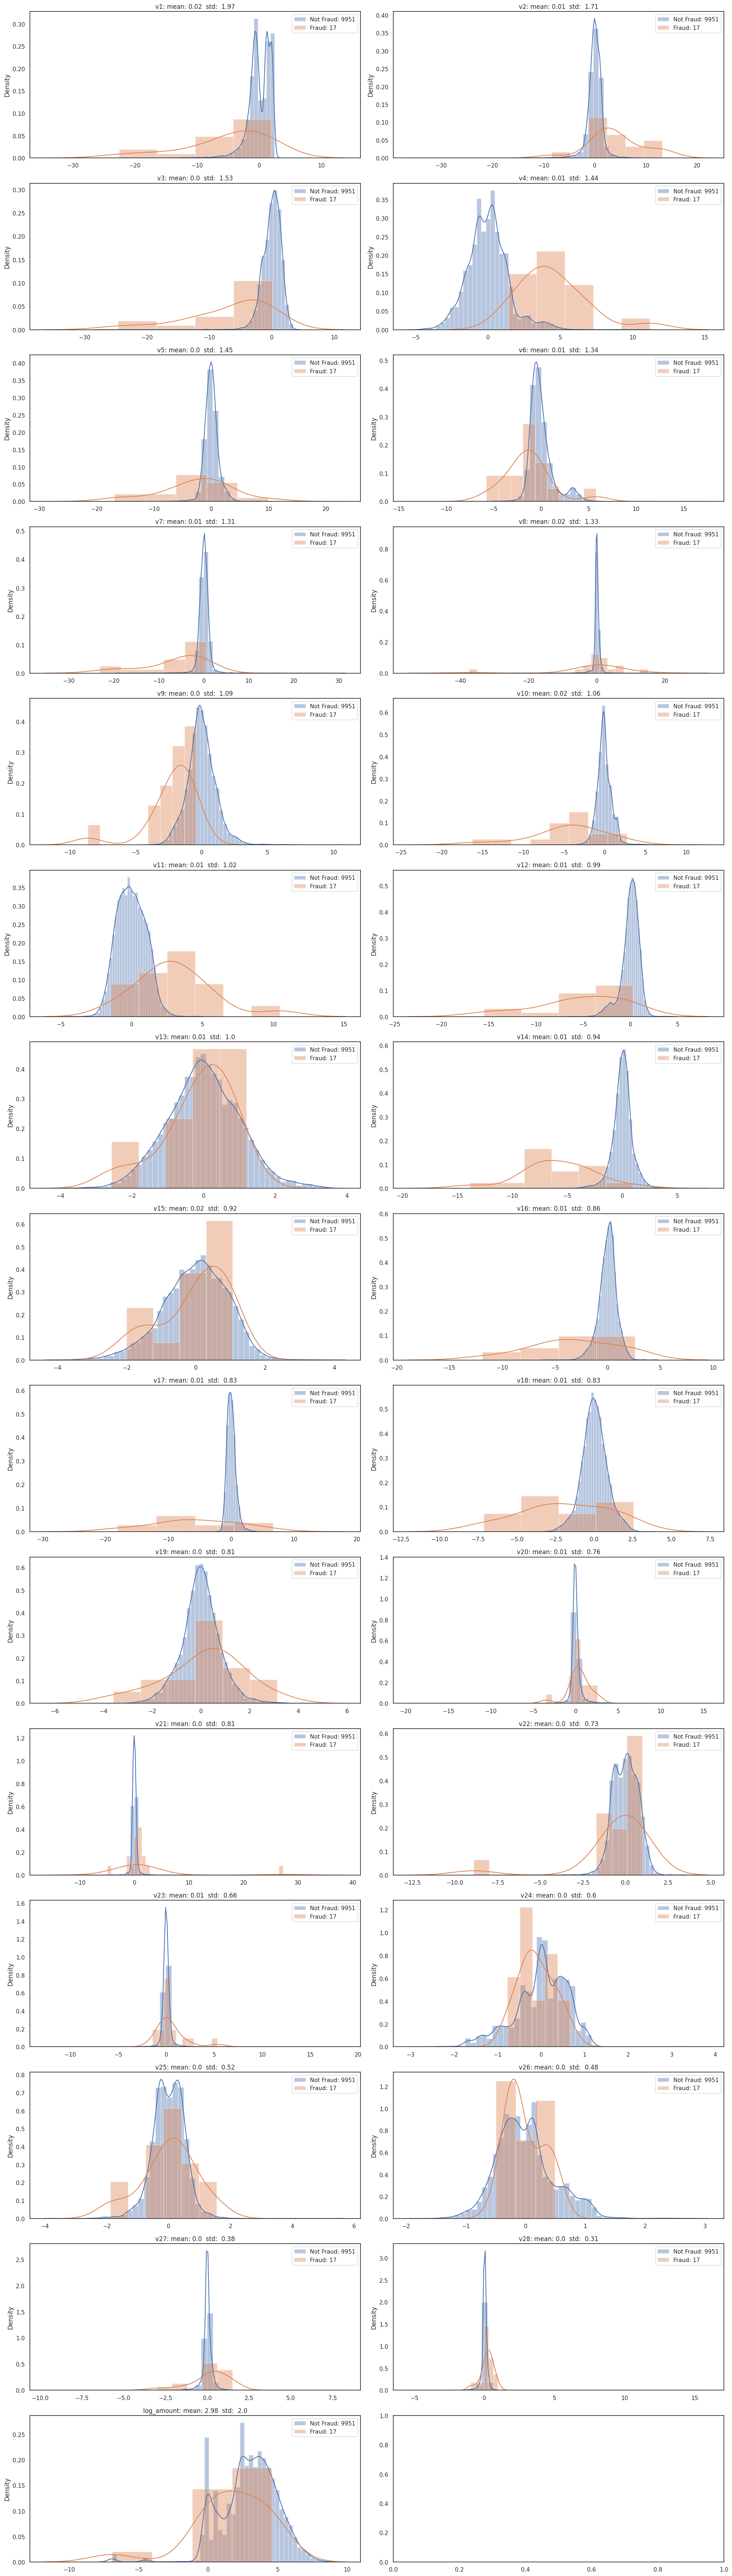

In [ ]:
#target과 독립변수들의 분포도
%matplotlib inline
fig, ax = plt.subplots(15, 2, figsize = (20, 70))

for i, feat in enumerate(X_train.T):
  sns.distplot(feat[y_train == 0], ax = ax.flat[i], label = '{}: {}'.format('Not Fraud', len(y_train[y_train == 0])))
  sns.distplot(feat[y_train == 1], ax = ax.flat[i], label = '{}: {}'.format('Fraud', len(y_train[y_train == 1])))
  ax.flat[i].set_title('{}: mean: {}  std:  {}'.format(list(df_under.columns)[i+1], abs(feat.mean().round(2)), feat.std().round(2)))
  ax.flat[i].legend()
plt.tight_layout()

In [ ]:
y_train == 0

array([ True,  True,  True, ...,  True,  True,  True])

<Axes: >

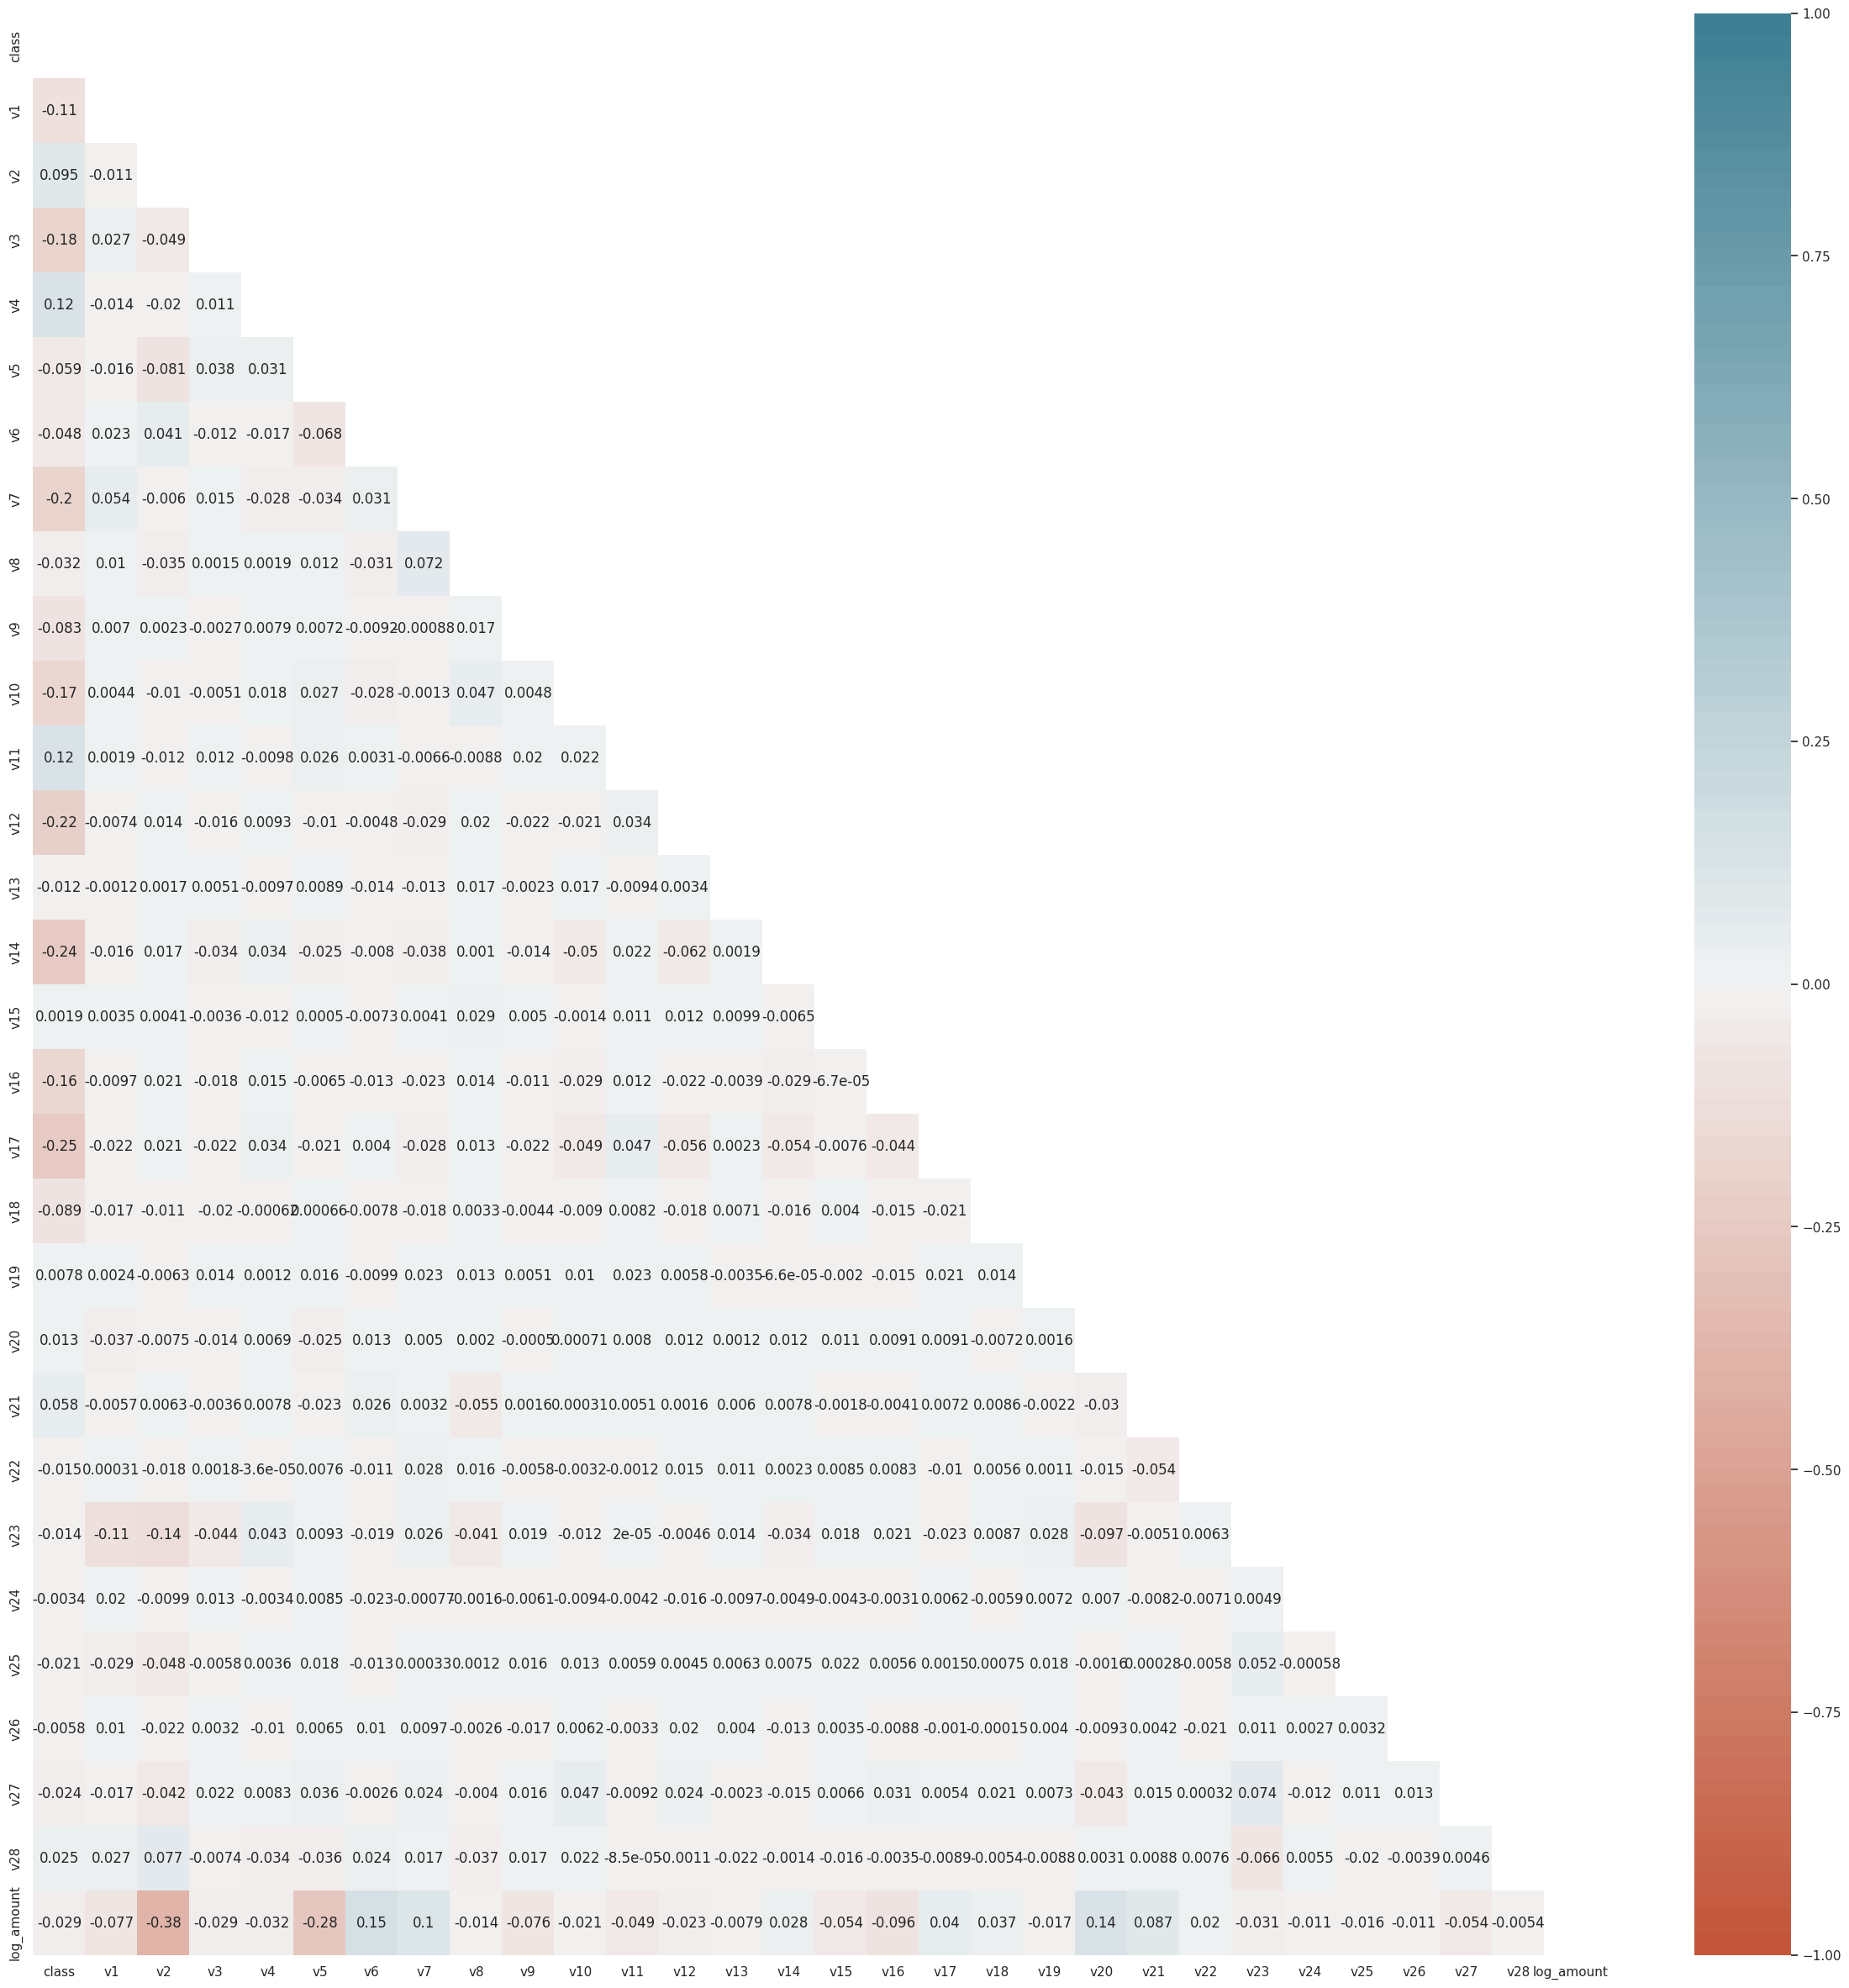

In [ ]:
#feature 별 상관계수
plt.figure(figsize = (30, 30))

mask = np.triu(df_under.corr())
sns.heatmap(df_under.corr(),
            annot = True, fmt = '.2g',
            mask = mask,
            vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n = 100))

In [ ]:
# sns.pairplot(df_under,
#              vars = df_under.columns,
#              kind = 'reg',
#              diag_kind = 'hist',
#              hue = 'class',
#              corner = True)

#Session 2  - Modeling

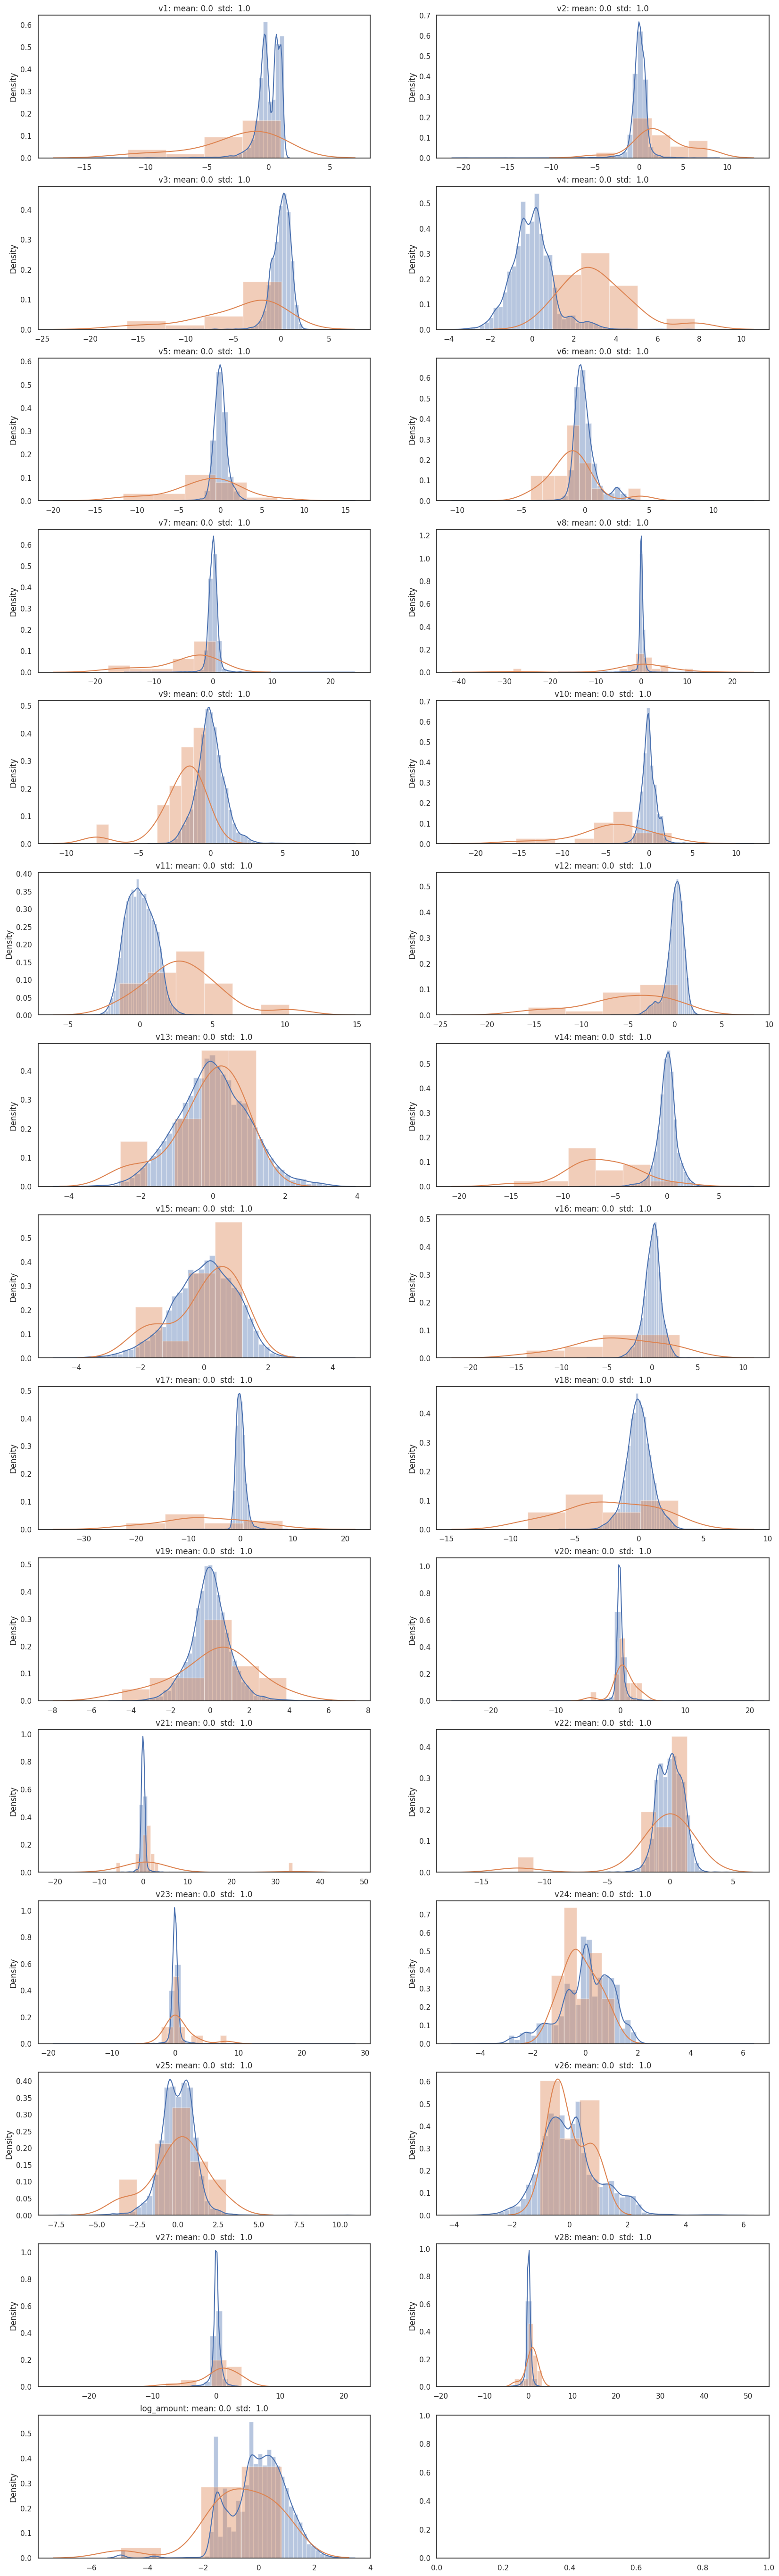

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

fig, ax = plt.subplots(15, 2, figsize = (20, 70))

for i, feat in enumerate(X_train_std.T):
  sns.distplot(feat[y_train == 0], ax = ax.flat[i], label = '{}: {}'.format('Not Fraud', len(y_train[y_train == 0])))
  sns.distplot(feat[y_train == 1], ax = ax.flat[i], label = '{}: {}'.format('Fraud', len(y_train[y_train == 1])))
  ax.flat[i].set_title('{}: mean: {}  std:  {}'.format(list(df_under.columns)[i+1], abs(feat.mean().round(2)), feat.std().round(2)))

##LogisticRegressionCV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv = 3, penalty = 'elasticnet', solver = 'saga',
                          Cs = np.power(10, np.arange(-3, 1, dtype = float)),
                          l1_ratios = np.linspace(0, 1, num = 6, dtype = float),
                          max_iter = 1000,
                          random_state = 0,
                          n_jobs = -1)

start = time()
lr.fit(X_train_std, y_train)
lr_dur = time() - start

print('LogisticeRegressionCV took {:.2f} seconds for {} cv iterations with {} parameter settings'.format(
    lr_dur, lr.n_iter_.shape[1], lr.n_iter_.shape[2] * lr.n_iter_.shape[3]))

print('Optimal regularization strength: {} Optimal L1 Ratio: {}'.format(lr.C_[0], lr.l1_ratio_[0]))
print('Accuracy (train): {:.2f}'.format(lr.score(X_train_std, y_train)))
print('Accuracy (test): {:.2f}'.format(lr.score(X_test_std, y_test)))

LogisticeRegressionCV took 181.89 seconds for 3 cv iterations with 24 parameter settings
Optimal regularization strength: 1.0 Optimal L1 Ratio: 0.0
Accuracy (train): 1.00
Accuracy (test): 1.00


In [ ]:
lr_params = dict(zip(list(df_under.columns)[1:], list(lr.coef_[0])),
                 intercept = lr.intercept_[0])
{param: value.round(2) for (param, value) in sorted(lr_params.items(), key = lambda item: item[1], reverse = True)}

{'v1': 0.89,
 'v4': 0.75,
 'v5': 0.51,
 'v28': 0.39,
 'v27': 0.31,
 'v24': 0.22,
 'v22': 0.21,
 'v23': 0.11,
 'v13': 0.1,
 'v20': 0.08,
 'v11': 0.05,
 'v21': 0.03,
 'v16': 0.0,
 'v26': -0.01,
 'v18': -0.04,
 'v2': -0.1,
 'v3': -0.1,
 'v10': -0.18,
 'v25': -0.19,
 'v7': -0.31,
 'v6': -0.31,
 'v12': -0.36,
 'log_amount': -0.38,
 'v8': -0.39,
 'v15': -0.42,
 'v19': -0.45,
 'v9': -0.5,
 'v17': -0.56,
 'v14': -1.06,
 'intercept': -9.76}

In [ ]:
#모델의 일관성 확인

from sklearn.model_selection import cross_val_score

def get_cross_val(clf, X, y, model_name, cv_num = 5, metric = 'f1'):
  scores = cross_val_score(clf, X, y, cv = cv_num, scoring = metric)
  mean = scores.mean()
  std = scores.std()
  p025 = np.quantile(scores, 0.025)
  p975 = np.quantile(scores, 0.975)
  metrics = ['mean', 'standard deviation', 'p025', 'p975']
  s = pd.Series([mean, std, p025, p975], index = metrics)
  s.name = model_name
  return s

def cal_metrics(y_true, y_pred, duration, model_name, *args):
  acc = accuracy_score(y_true, y_pred)
  pre = precision_score(y_true, y_pred)
  rec = recall_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  ck = cohen_kappa_score(y_true, y_pred)
  p, r, fbeta, support = precision_recall_fscore_support(y_true, y_pred)
  metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1_score', 'cohen_kappa',
             'precision_both', 'recall_both', 'fbeta_both', 'support_both', 'time_to_fit(seconds)']
  s = pd.Series([acc, pre, rec, roc_auc, f1, ck, p, r, fbeta, support, duration], index = metrics)
  s.name = model_name
  return s

In [ ]:
#편차가 크므로 좋은 모델이라고 보기에는 어려움
lr_cv = get_cross_val(lr, X_test_std, y_test, 'Logistic Regression')
lr_cv.round(2)

mean                  0.53
standard deviation    0.28
p025                  0.05
p975                  0.79
Name: Logistic Regression, dtype: float64

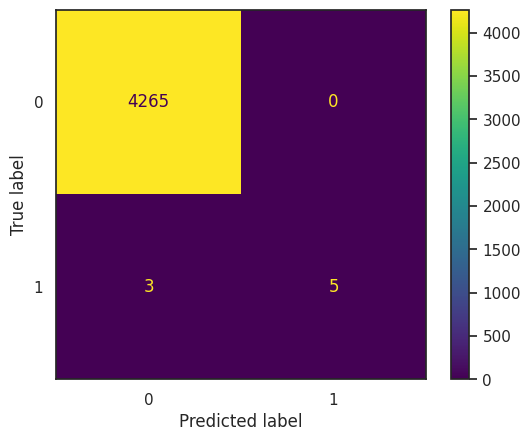

In [ ]:
y_pred = lr.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()

In [ ]:
y_pred = lr.predict(X_test_std)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4265
           1       1.00      0.62      0.77         8

    accuracy                           1.00      4273
   macro avg       1.00      0.81      0.88      4273
weighted avg       1.00      1.00      1.00      4273



In [ ]:
#정답의 수가 적으므로 recall이 중요

lr_metrics = cal_metrics(y_test, y_pred, lr_dur, 'Logistioc_Regression')
lr_metrics

accuracy                                                0.999298
precision                                                    1.0
recall                                                     0.625
roc_auc                                                   0.8125
f1_score                                                0.769231
cohen_kappa                                             0.768898
precision_both                         [0.9992970946579194, 1.0]
recall_both                                         [1.0, 0.625]
fbeta_both              [0.9996484237665534, 0.7692307692307693]
support_both                                           [4265, 8]
time_to_fit(seconds)                                  181.886335
Name: Logistioc_Regression, dtype: object

##K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': np.arange(1, 16)}

knn = KNeighborsClassifier()

gs_knn = GridSearchCV(knn, param_grid = param_grid)

start = time()
gs_knn.fit(X_train_std, y_train)
knn_dur = time()  -  start

In [ ]:
print('GridSearchCV took {:.2f} seconds for {} candidate parameter settings'.format(
    knn_dur,len(gs_knn.cv_results_['params'])))
print('Optimal weights: {} Optimal n_neighbors: {}'.format(gs_knn.best_params_['weights'], gs_knn.best_params_['n_neighbors']))
print('Accuracy (train): {:.2f}'.format(gs_knn.score(X_train_std, y_train)))
print('Accuracy (test): {:.2f}'.format(gs_knn.score(X_test_std, y_test)))

GridSearchCV took 27.43 seconds for 30 candidate parameter settings
Optimal weights: distance Optimal n_neighbors: 7
Accuracy (train): 1.00
Accuracy (test): 1.00


In [ ]:
pprint(gs_knn.best_estimator_.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'distance'}


In [ ]:
#편차가 크므로 좋은 모델이라기 하기 어려움
knn_cv = get_cross_val(gs_knn, X_test_std, y_test, 'K-Nearest Neighbors')
knn_cv.round(2)

mean                  0.73
standard deviation    0.39
p025                  0.07
p975                  1.00
Name: K-Nearest Neighbors, dtype: float64

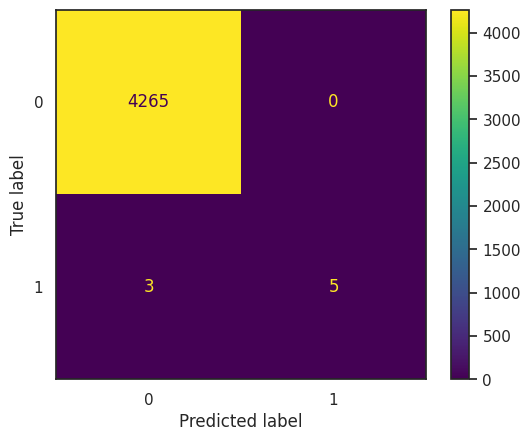

In [ ]:
y_pred = gs_knn.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gs_knn.classes_)
disp.plot()

In [ ]:
y_pred = gs_knn.predict(X_test_std)

print(classification_report(y_test, y_pred
                            ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4265
           1       1.00      0.62      0.77         8

    accuracy                           1.00      4273
   macro avg       1.00      0.81      0.88      4273
weighted avg       1.00      1.00      1.00      4273



In [ ]:
knn_metrics = cal_metrics(y_test, y_pred, knn_dur, 'K-Nearest Neighbors')
knn_metrics

accuracy                                                0.999298
precision                                                    1.0
recall                                                     0.625
roc_auc                                                   0.8125
f1_score                                                0.769231
cohen_kappa                                             0.768898
precision_both                         [0.9992970946579194, 1.0]
recall_both                                         [1.0, 0.625]
fbeta_both              [0.9996484237665534, 0.7692307692307693]
support_both                                           [4265, 8]
time_to_fit(seconds)                                   27.430387
Name: K-Nearest Neighbors, dtype: object

##Linear discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'],
              'n_components': np.arange(1, 5)}

lda = LinearDiscriminantAnalysis()

gs_lda = GridSearchCV(lda, param_grid = param_grid)

start = time()
gs_lda.fit(X_train_std, y_train)
lda_dur = time()  -  start

In [ ]:
print('GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings'.format(
    lda_dur,len(gs_lda.cv_results_['params'])))
print('Optimal solver: {} Optimal shrinkage: {} Optimal n_components: {}'.format(gs_lda.best_params_['solver'], gs_lda.best_params_['shrinkage'], gs_lda.best_params_['n_components']))
print('Accuracy (train): {:.2f}'.format(gs_lda.score(X_train_std, y_train)))
print('Accuracy (test): {:.2f}'.format(gs_lda.score(X_test_std, y_test)))

GridSearchCV of LDA took 2.54 seconds for 16 candidate parameter settings
Optimal solver: lsqr Optimal shrinkage: None Optimal n_components: 1
Accuracy (train): 1.00
Accuracy (test): 1.00


In [ ]:
lda_cv = get_cross_val(gs_lda, X_test_std, y_test, 'Linear Discriminant Analysis')
lda_cv.round(2)

mean                  0.76
standard deviation    0.13
p025                  0.67
p975                  0.98
Name: Linear Discriminant Analysis, dtype: float64

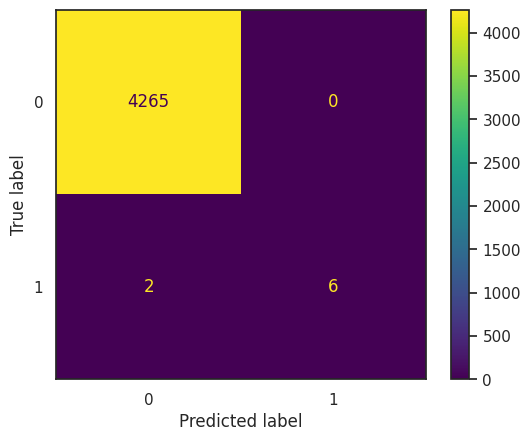

In [ ]:
#모델학습 속도도 매우 빠르고, 편차도 많이 줄어듬. 좋은 모델이라고 생각할 수 있음
y_pred = gs_lda.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gs_lda.classes_)
disp.plot()

In [ ]:
y_pred = gs_lda.predict(X_test_std)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4265
           1       1.00      0.75      0.86         8

    accuracy                           1.00      4273
   macro avg       1.00      0.88      0.93      4273
weighted avg       1.00      1.00      1.00      4273



In [ ]:
lda_metrics = cal_metrics(y_test, y_pred, lda_dur, 'Linear Discriminant Analysis')
lda_metrics

accuracy                                                0.999532
precision                                                    1.0
recall                                                      0.75
roc_auc                                                    0.875
f1_score                                                0.857143
cohen_kappa                                             0.856913
precision_both                          [0.999531286618233, 1.0]
recall_both                                          [1.0, 0.75]
fbeta_both              [0.9997655883731834, 0.8571428571428571]
support_both                                           [4265, 8]
time_to_fit(seconds)                                    2.539276
Name: Linear Discriminant Analysis, dtype: object

##Support Vector Machine

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': np.power(10, np.arange(0, 3, dtype = float)),
              'kernel': ['linear', 'sigmoid', 'rbf'],
              'gamma':['auto', 'scale']}

svc = SVC()

gs_svc = GridSearchCV(svc, param_grid = param_grid)

start = time()
gs_svc.fit(X_train_std, y_train)
SVC_dur = time()  -  start

In [ ]:
print('GridSearchCV of SVC took {:.2f} seconds for {} candidate parameter settings'.format(
    SVC_dur,len(gs_svc.cv_results_['params'])))
print('Optimal solver: {} Optimal shrinkage: {} Optimal n_components: {}'.format(gs_svc.best_params_['C'], gs_svc.best_params_['kernel'], gs_svc.best_params_['gamma']))
print('Accuracy (train): {:.2f}'.format(gs_svc.score(X_train_std, y_train)))
print('Accuracy (test): {:.2f}'.format(gs_svc.score(X_test_std, y_test)))

GridSearchCV of SVC took 10.62 seconds for 18 candidate parameter settings
Optimal solver: 1.0 Optimal shrinkage: sigmoid Optimal n_components: scale
Accuracy (train): 1.00
Accuracy (test): 1.00


In [ ]:
#편차가 크므로 좋은 모델이라고 생각하기 어렵다
svc_cv = get_cross_val(gs_svc, X_test_std, y_test, 'Support Vector Machines')
svc_cv.round(2)

mean                  0.67
standard deviation    0.37
p025                  0.07
p975                  1.00
Name: Support Vector Machines, dtype: float64

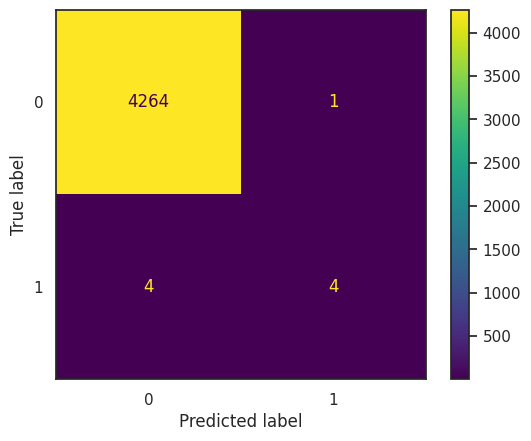

In [ ]:
#미탐지 4개뿐만아니라 오탐지도 1개 발견
y_pred = gs_svc.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gs_svc.classes_)
disp.plot()

In [ ]:
y_pred = gs_svc.predict(X_test_std)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4265
           1       0.80      0.50      0.62         8

    accuracy                           1.00      4273
   macro avg       0.90      0.75      0.81      4273
weighted avg       1.00      1.00      1.00      4273



In [ ]:
#recall 이 낮음
svc_metrics = cal_metrics(y_test, y_pred, SVC_dur, 'Support Vector Machine')
svc_metrics

accuracy                                                 0.99883
precision                                                    0.8
recall                                                       0.5
roc_auc                                                 0.749883
f1_score                                                0.615385
cohen_kappa                                              0.61483
precision_both                         [0.9990627928772259, 0.8]
recall_both                            [0.9997655334114889, 0.5]
fbeta_both              [0.9994140396109223, 0.6153846153846154]
support_both                                           [4265, 8]
time_to_fit(seconds)                                   10.616369
Name: Support Vector Machine, dtype: object

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': np.arange(100, 800, 200, dtype = int),
              'max_features': [None, 'sqrt', 'log2'],
              'max_depth':[None, 3, 5]}

rf = RandomForestClassifier()

gs_rf = GridSearchCV(rf, param_grid = param_grid)

start = time()
gs_rf.fit(X_train_std, y_train)
rf_dur = time()  -  start

In [ ]:
print('GridSearchCV of RF took {:.2f} seconds for {} candidate parameter settings'.format(
    rf_dur,len(gs_rf.cv_results_['params'])))
print('Optimal solver: {} Optimal shrinkage: {} Optimal n_components: {}'.format(gs_rf.best_params_['n_estimators'], gs_rf.best_params_['max_features'], gs_rf.best_params_['max_depth']))
print('Accuracy (train): {:.2f}'.format(gs_rf.score(X_train_std, y_train)))
print('Accuracy (test): {:.2f}'.format(gs_rf.score(X_test_std, y_test)))

GridSearchCV of RF took 3044.03 seconds for 36 candidate parameter settings
Optimal solver: 700 Optimal shrinkage: None Optimal n_components: 3
Accuracy (train): 1.00
Accuracy (test): 1.00


In [ ]:
rf = RandomForestClassifier(n_estimators = gs_rf.best_params_['n_estimators'],
                            max_features = gs_rf.best_params_['max_features'],
                            max_depth = gs_rf.best_params_['max_depth'],
                            oob_score = True,
                            random_state = 0)

NameError: name 'clf_rf' is not defined

In [ ]:
rf_cv = get_cross_val(rf, X_test_std, y_test, 'Random Forest')
rf_cv.round(2)

mean                  0.30
standard deviation    0.40
p025                  0.00
p975                  0.95
Name: Random Forest, dtype: float64

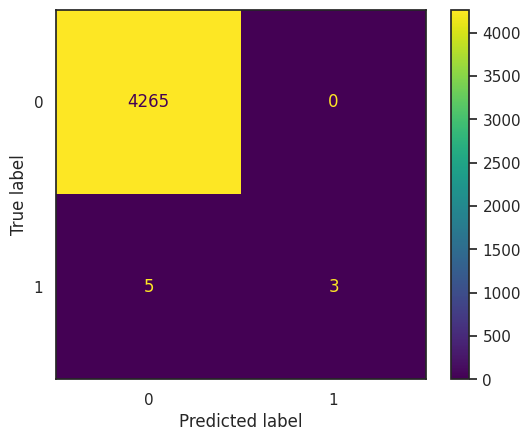

In [ ]:
y_pred = gs_rf.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gs_rf.classes_)
disp.plot()

In [ ]:
y_pred = gs_rf.predict(X_test_std)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4265
           1       1.00      0.38      0.55         8

    accuracy                           1.00      4273
   macro avg       1.00      0.69      0.77      4273
weighted avg       1.00      1.00      1.00      4273



In [ ]:
rf_metrics = cal_metrics(y_test, y_pred, rf_dur, 'Random Forest')
rf_metrics

accuracy                                                 0.99883
precision                                                    1.0
recall                                                     0.375
roc_auc                                                   0.6875
f1_score                                                0.545455
cohen_kappa                                              0.54499
precision_both                         [0.9988290398126464, 1.0]
recall_both                                         [1.0, 0.375]
fbeta_both              [0.9994141769185706, 0.5454545454545454]
support_both                                           [4265, 8]
time_to_fit(seconds)                                 3044.030594
Name: Random Forest, dtype: object

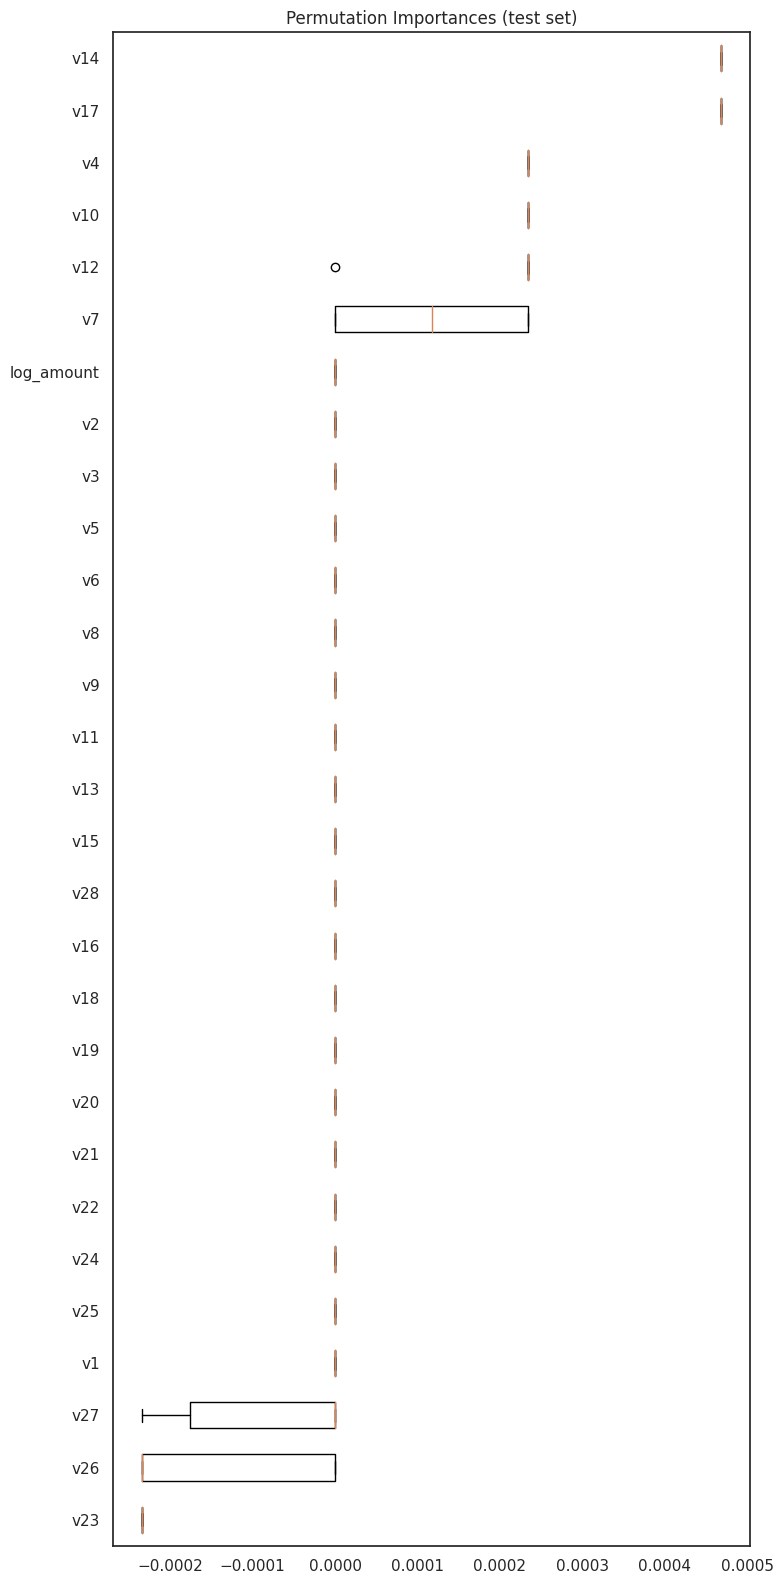

In [ ]:
#독립변수들의 영향력 확인
from sklearn.inspection import permutation_importance
result = permutation_importance(gs_rf, X_test_std, y_test, n_repeats = 10,
                                random_state = 42, n_jobs = -1)
sorted_idx = result.importances_mean.argsort()

X_test_df = pd.DataFrame(X_test_std, columns = list(df_under.columns)[1:])

fig, ax = plt.subplots(figsize = (8, 16))
ax.boxplot(result.importances[sorted_idx].T,
           vert = False, labels = X_test_df.columns[sorted_idx])

ax.set_title('Permutation Importances (test set)')
plt.tight_layout()

##Compare Models

In [ ]:
model_metrics = pd.concat([lr_metrics, knn_metrics, lda_metrics, svc_metrics, rf_metrics], axis = 1).T

model_metrics.apply(lambda elem: [np.round(val, 4) for val in elem]).sort_values(by = 'f1_score', ascending = False)

,accuracy,precision,recall,roc_auc,f1_score,cohen_kappa,precision_both,recall_both,fbeta_both,support_both,time_to_fit(seconds)
Linear Discriminant Analysis,0.9995,1.0,0.750,0.8750,0.8571,0.8569,"[0.9995, 1.0]","[1.0, 0.75]","[0.9998, 0.8571]","[4265, 8]",2.5393
Logistioc_Regression,0.9993,1.0,0.625,0.8125,0.7692,0.7689,"[0.9993, 1.0]","[1.0, 0.625]","[0.9996, 0.7692]","[4265, 8]",181.8863
K-Nearest Neighbors,0.9993,1.0,0.625,0.8125,0.7692,0.7689,"[0.9993, 1.0]","[1.0, 0.625]","[0.9996, 0.7692]","[4265, 8]",27.4304
Support Vector Machine,0.9988,0.8,0.500,0.7499,0.6154,0.6148,"[0.9991, 0.8]","[0.9998, 0.5]","[0.9994, 0.6154]","[4265, 8]",10.6164
Random Forest,0.9988,1.0,0.375,0.6875,0.5455,0.5450,"[0.9988, 1.0]","[1.0, 0.375]","[0.9994, 0.5455]","[4265, 8]",3044.0306


In [ ]:
cross_vals = pd.concat([lr_cv, knn_cv, lda_cv, svc_cv, rf_cv], axis = 1).T

cross_vals = cross_vals.round(4).sort_values(by = 'mean', ascending = False)
cross_vals

,mean,standard deviation,p025,p975
Linear Discriminant Analysis,0.7600,0.1306,0.6667,0.9800
K-Nearest Neighbors,0.7333,0.3887,0.0667,1.0000
Support Vector Machines,0.6667,0.3651,0.0667,1.0000
Logistic Regression,0.5267,0.2800,0.0500,0.7867
Random Forest,0.3000,0.4000,0.0000,0.9500


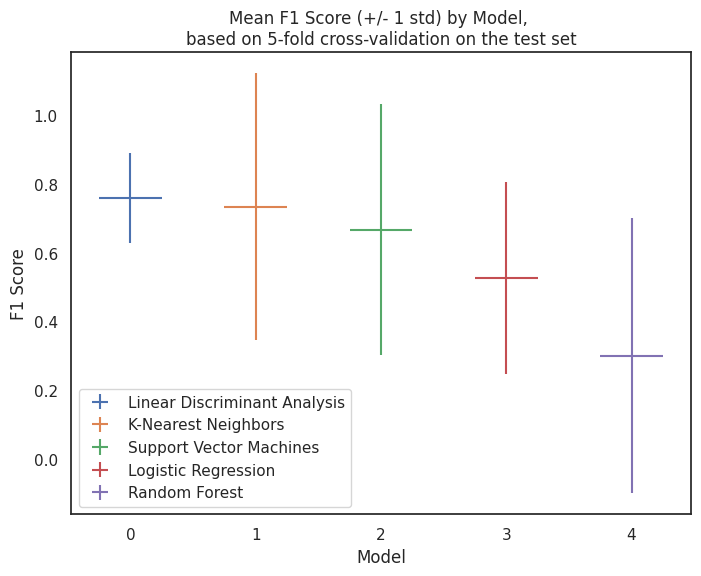

In [ ]:
#편차가 적고 acuuracy와 recall 이 높은 lda모델이 최적의 모델이라고 생각됨
#복잡한 모델이 항상 좋은 결과를 가져오지는 못함
fig = plt.figure(figsize = (8, 6))

for i in range(len(cross_vals.index)):
  plt.errorbar(x = i, y = cross_vals.iloc[i, 0],
               xerr = 0.25,
               yerr = cross_vals.iloc[i, 1],
               linestyle = '',
               label = list(cross_vals.index)[i])

plt.title('Mean F1 Score (+/- 1 std) by Model, \nbased on 5-fold cross-validation on the test set')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.legend(loc = 'lower left')

#Session 3 - Feature Engineering

##Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 0)

X_over, y_over = ros.fit_resample(X_train_std, y_train)

from collections import Counter
print(sorted(Counter(y_over).items()))

[(0, 9951), (1, 9951)]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'],
              'n_components': np.arange(1, 5)}

lda = LinearDiscriminantAnalysis()

gs_lda = GridSearchCV(lda, param_grid = param_grid)

start = time()
gs_lda.fit(X_over, y_over)
lda_dur = time()  -  start

In [ ]:
print('GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings'.format(
    lda_dur,len(gs_lda.cv_results_['params'])))
print('Optimal solver: {} Optimal shrinkage: {} Optimal n_components: {}'.format(gs_lda.best_params_['solver'], gs_lda.best_params_['shrinkage'], gs_lda.best_params_['n_components']))
print('Accuracy (train): {:.2f}'.format(gs_lda.score(X_train_std, y_train)))
print('Accuracy (test): {:.2f}'.format(gs_lda.score(X_test_std, y_test)))

GridSearchCV of LDA took 2.41 seconds for 16 candidate parameter settings
Optimal solver: lsqr Optimal shrinkage: None Optimal n_components: 1
Accuracy (train): 0.98
Accuracy (test): 0.98


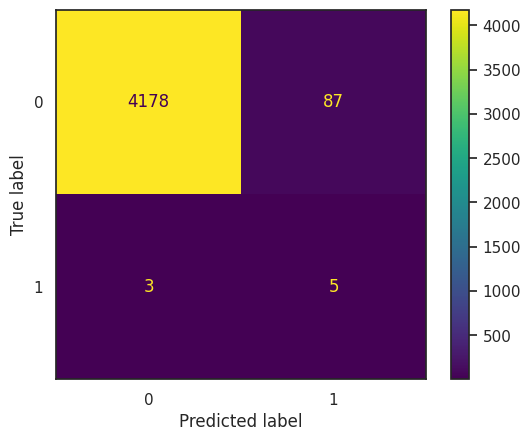

In [ ]:
#미탐지 3개뿐만아니라 오탐지도 87개 발견
#Over Sampling으로 학습 데이터를 늘린다 하더라도 좋은 결과를 반드시 얻지는 못한다
y_pred = gs_lda.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gs_lda.classes_)
disp.plot()

In [ ]:
rf_metrics = cal_metrics(y_test, y_pred, lda_dur, 'LDA Over Sampling')
rf_metrics

accuracy                                                 0.978938
precision                                                0.054348
recall                                                      0.625
roc_auc                                                  0.802301
f1_score                                                      0.1
cohen_kappa                                              0.096889
precision_both           [0.999282468309017, 0.05434782608695652]
recall_both                           [0.9796014067995311, 0.625]
fbeta_both              [0.9893440681979636, 0.09999999999999999]
support_both                                            [4265, 8]
time_to_fit(seconds)                                     2.412106
Name: LDA Over Sampling, dtype: object